In [ ]:
#Module 1: Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data set
data=pd.read_csv('forest_health_data.csv')
print(data)

     Plot_ID   Latitude   Longitude        DBH  Tree_Height  \
0          1  24.981605 -117.040695  29.862040    20.835684   
1          2  48.028572  -92.066934  28.462986    24.307079   
2          3  39.279758  -68.893791  91.094185     9.013101   
3          4  33.946339  -78.744258  28.706889    19.496475   
4          5  16.240746  -73.540720  30.835224    18.008888   
..       ...        ...         ...        ...          ...   
995      996  13.663283  -84.013139  87.203097    14.378997   
996      997  46.692543  -63.036977  19.940955    11.363233   
997      998  15.472745 -125.172939  34.429847    13.048025   
998      999  48.009494 -126.006170  32.554326    16.838336   
999     1000  27.840231 -110.246905  87.784333     6.518286   

     Crown_Width_North_South  Crown_Width_East_West      Slope    Elevation  \
0                   6.147963               4.542720  29.171563   212.518419   
1                   8.248891               5.260921   7.757386   641.640332   
2     

In [ ]:
#Module 2:Cleaning

print(data.isnull().sum())

data.fillna(method='ffill',inplace=True)

#Check for duplicates
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

Plot_ID                    0
Latitude                   0
Longitude                  0
DBH                        0
Tree_Height                0
Crown_Width_North_South    0
Crown_Width_East_West      0
Slope                      0
Elevation                  0
Soil_TN                    0
Soil_TP                    0
Soil_AP                    0
Soil_AN                    0
Menhinick_Index            0
Gleason_Index              0
Disturbance_Level          0
Fire_Risk_Index            0
Health_Status              0
dtype: int64
0


<ipython-input-4-5d91284f4dbf>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


In [ ]:
#Module 3: Analyzing

stats=data.describe()
print(stats)

# Analyzing forest health by the Health_Status
health_counts=data['Health_Status'].value_counts()
print(health_counts)

health_by_disturbance=data.groupby('Disturbance_Level')['Health_Status'].value_counts().unstack()
print(health_by_disturbance)

           Plot_ID     Latitude    Longitude          DBH  Tree_Height  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    29.610262   -94.508789    52.728544    15.730501   
std     288.819436    11.685494    20.453293    27.614049     8.021702   
min       1.000000    10.185281  -129.774722     5.001105     2.018295   
25%     250.750000    19.438931  -113.124801    29.828343     8.773222   
50%     500.500000    29.872295   -93.688627    52.558322    15.559820   
75%     750.250000    39.772784   -76.767446    77.114835    22.651143   
max    1000.000000    49.988707   -60.041039    99.792981    29.987616   

       Crown_Width_North_South  Crown_Width_East_West        Slope  \
count              1000.000000            1000.000000  1000.000000   
mean                  5.446948               5.486180    22.198898   
std                   2.581289               2.602753    13.038014   
min                   1.000276               1.055654

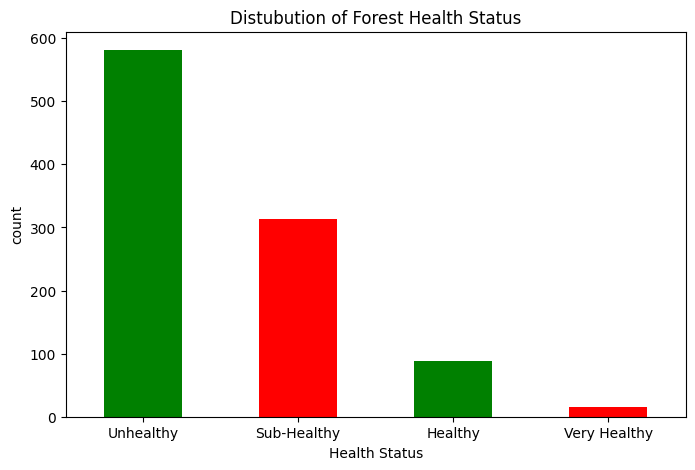

<Figure size 1000x600 with 0 Axes>

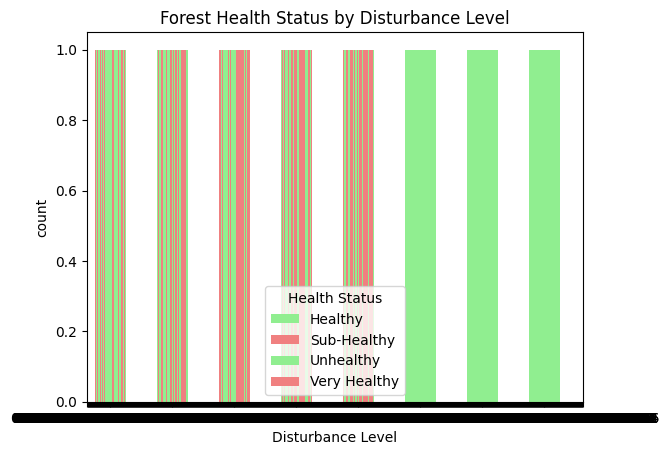

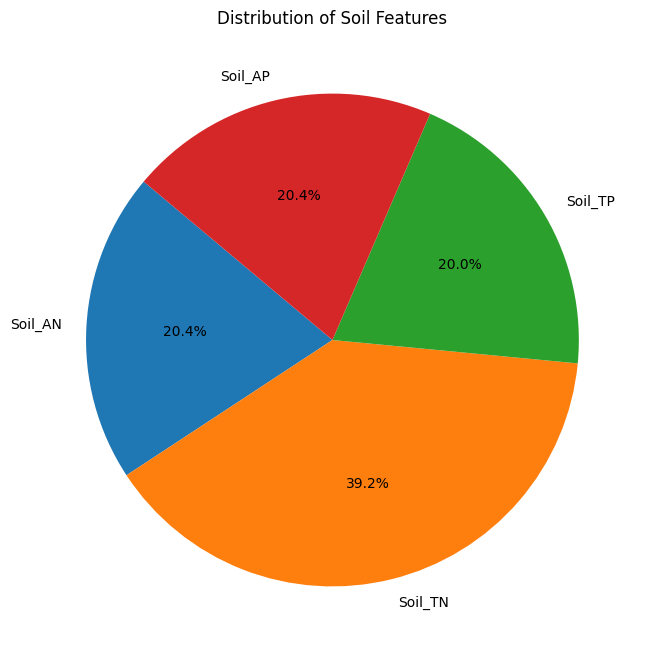

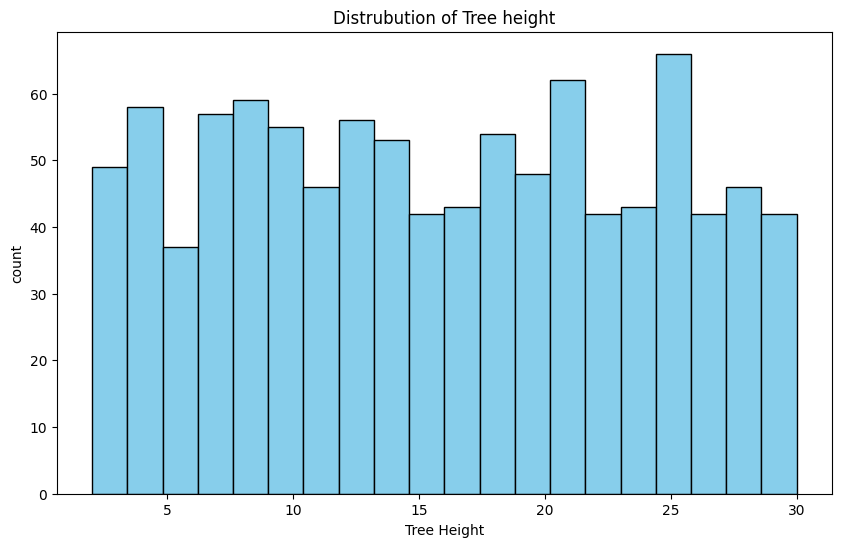

In [64]:
#Module 4:Visulizing

# Plotting health status distribution
plt.figure(figsize=(8,5))
health_counts.plot(kind='bar',color=['green','red'])
plt.title('Distubution of Forest Health Status')
plt.xlabel('Health Status')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

# Visualizing health status by disturbance level
plt.figure(figsize=(10,6))
health_by_disturbance.plot(kind='bar',stacked=True,color=['lightgreen','lightcoral'])
plt.title('Forest Health Status by Disturbance Level')
plt.xlabel('Disturbance Level')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title='Health Status')
plt.show()


# Plot the pie chart

soil_features = ['Soil_AN', 'Soil_TN', 'Soil_TP', 'Soil_AP']

soil_sums = data[soil_features].sum()

plt.figure(figsize=(8, 8))
plt.pie(soil_sums, labels=soil_features, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Soil Features")
plt.show()

# Plotting tree height
plt.figure(figsize=(10,6))
Tree_Height.plot(kind='hist',bins=20,color='skyblue',edgecolor='black')
plt.title('Distrubution of Tree height')
plt.xlabel('Tree Height')
plt.ylabel('count')
plt.show()